# Flight Ticket Price Prediction 
## Problem Statement
- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.Size of data: 10683 records 
### FEATURES:
- Airline: The name of the airline. 
- Date_of_Journey: The date of the journey 
- Source: The source from which the service begins. 
- Destination: The destination where the service ends. 
- Route: The route taken by the flight to reach the destination. 
- Dep_Time: The time when the journey starts from the source. 
- Arrival_Time: Time of arrival at the destination. 
- Duration: Total duration of the flight. 
- Total_Stops: Total stops between the source and destination. 
- Additional_Info: Additional information about the flight 
- Price: The price of the ticket

In [25]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( 'ignore')
import klib as kb

# Import  dataset

In [11]:
data=pd.read_excel("D:\dataset np\Data_Train.xlsx")

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
# Data Cleaning

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
data.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [18]:
data.shape

(10682, 11)

### EDA
1. from discription we can see that Date_of_journey is aobject data type
   therefore we have to convert this datatype into timestamp

In [26]:
data['journey_day']= pd.to_datetime(data.Date_of_Journey).dt.day

In [27]:
data['journey_month']= pd.to_datetime(data.Date_of_Journey).dt.month

In [28]:
#since we convert data_of journey column into integer so we can drop it
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [29]:
#Departure time is when plane leaves the gate
#similar to date_of_journey we can extract values from dep_time


data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour

#extracting minutes
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

#now we convert Dep_Time column into integer so we can drop it
data.drop(['Dep_Time'],axis=1,inplace=True)


In [30]:
#Arrival time is when plane pulls up to the gate
#similar to date_of_journey we can extract values from Arrival_Time


#extracting minutes
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour


#extracting minutes
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute


#now we convert Dep_Time column into integer so we can drop it
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [31]:
#Time taken by plane to reach destination is called duration
#it is difference between dep_time and arrival_time

#assining and converting Duration column in list
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2: #check if duration contains only hours or minutes
        #print(duration[i])
        if "h" in duration[i]:
            duration[i]=duration[i] + " 0m"# add 0 minutes
            
        else:
            duration[i]="0h "+ duration[i]    #add 0 hour
            #print(duration[i])
            
duration_hours=[]
duration_min=[]

for i in range(len(duration)):
    a=duration[i].split(sep="m")[0].split()[-1]
    #print(int(a))
    duration_hours.append(int(duration[i].split(sep="h")[0])) #extract hours
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1])) #extract only min"""

In [32]:
data["duration_hours"]=duration_hours
data["duration_min"]=duration_min

In [33]:
# Here I convert Duration column into minutes

duration_h=data['duration_hours']
duration_m=list(data['duration_min'])
duration_M=[]
for i in duration_h:
    minutes=i*60
    duration_M.append(minutes)

c=list(zip(duration_M,duration_m)) 

Duration=[i+j for i,j in c]
data['Duration']=Duration
data.drop(['duration_hours','duration_min'],axis=1,inplace=True)

In [34]:
print(data['Additional_Info'].value_counts())

#in additional info column there is 80% of total info is no info given so we drop additional info column
data.drop(['Additional_Info'],axis=1,inplace=True)


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


In [35]:
data['Route1']=data['Route'].str.split('→').str[0]
data['Route2']=data['Route'].str.split('→').str[1]
data['Route3']=data['Route'].str.split('→').str[2]
data['Route4']=data['Route'].str.split('→').str[3]
data['Route5']=data['Route'].str.split('→').str[4]
data.drop(['Route'],inplace=True,axis=1)

In [37]:
data.isna().sum()

Airline              0
Source               0
Destination          0
Duration             0
Total_Stops          0
Price                0
journey_day          0
journey_month        0
Dep_hour             0
Dep_min              0
Arrival_hour         0
Arrival_min          0
Route1               0
Route2               0
Route3            3491
Route4            9116
Route5           10636
dtype: int64

In [38]:
#fill missing values
for i in ['Route3', 'Route4', 'Route5']:
    data[i].fillna('None',inplace=True)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,16,50,21,35,BLR,NAG,DEL,None,None


# Handling categorical data
one can find many ways to handle categorical data, some of them categorical data are,

1 Nominal data -- onehotencoder used in this case

2 Ordinal data -- Label encoder used in this case 

In [39]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

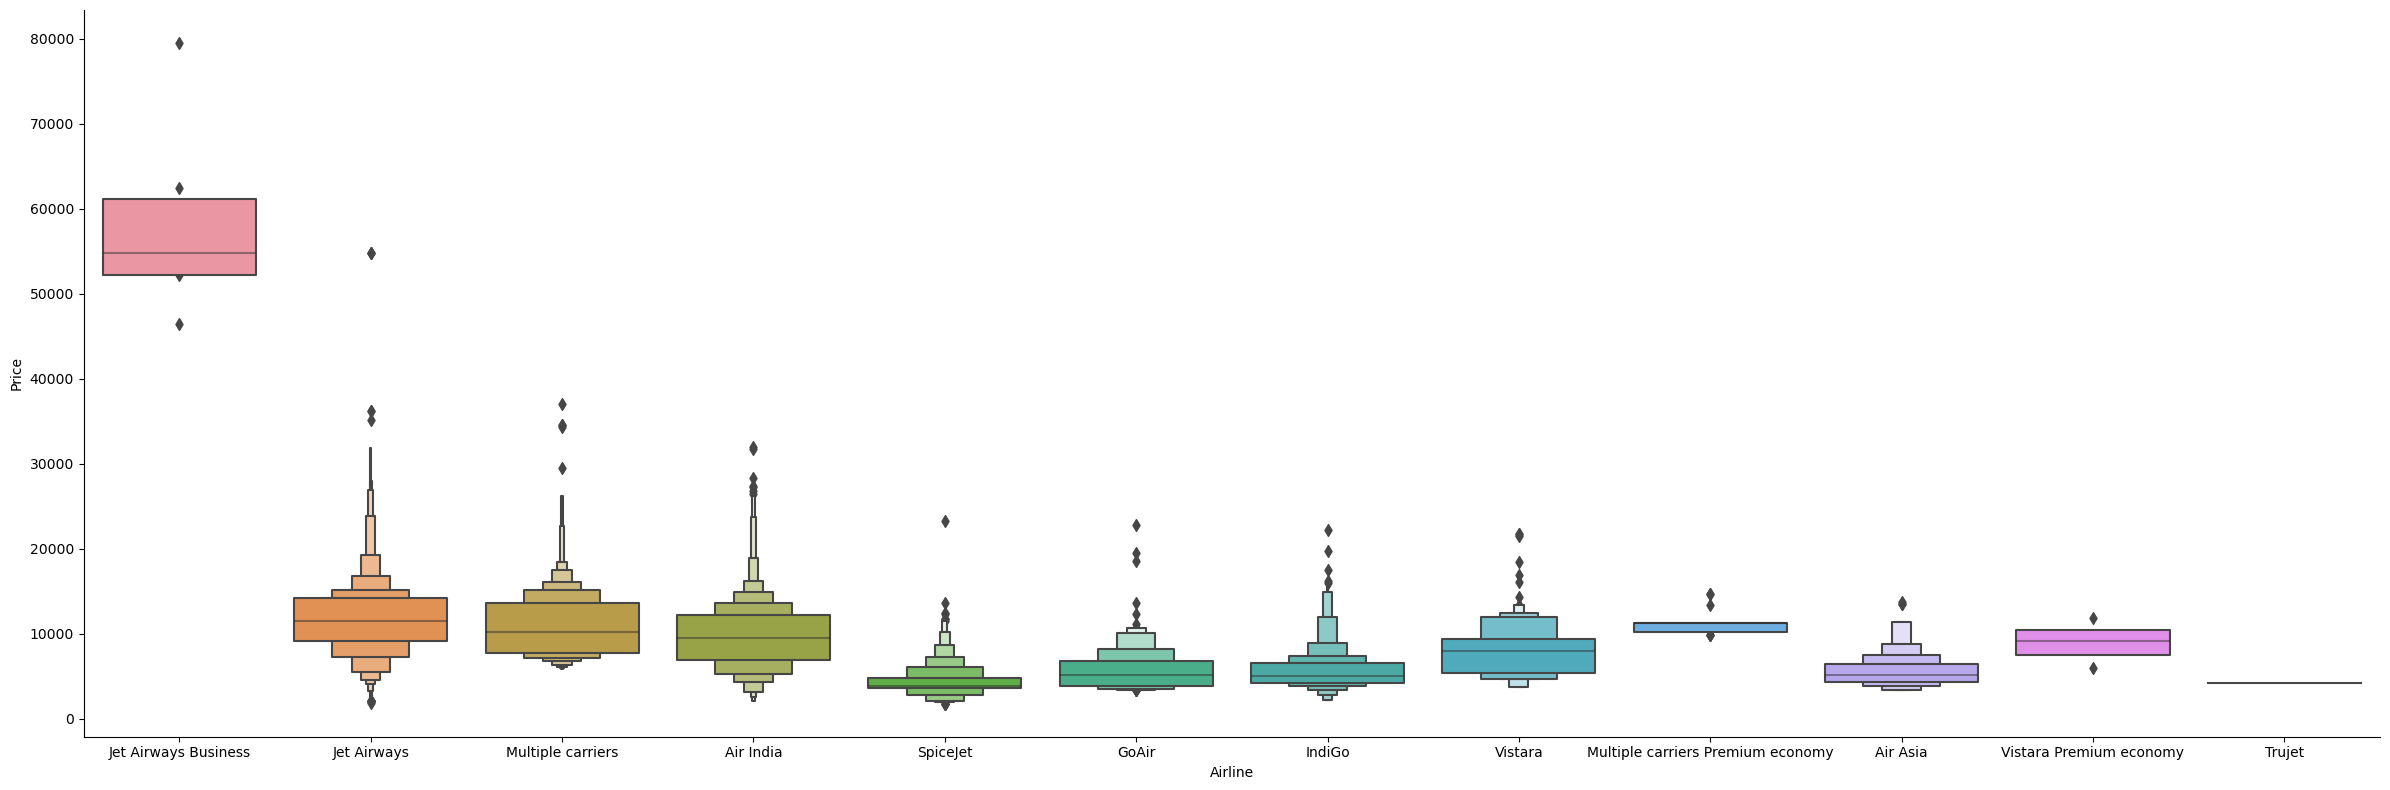

In [40]:
#from the graph we can seen that jet airways Business have the highest price
#Apart from the first airline almost all are having similar median

#Airline vs Price
sns.catplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)
plt.show()

- from the graph we can seen that jet airways Business have the highest price
  Apart from the first airline almost all are having similar median


In [41]:
#As Airline is nominal categorical data so we apply onehotencoding
Airline=data[["Airline"]]

Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

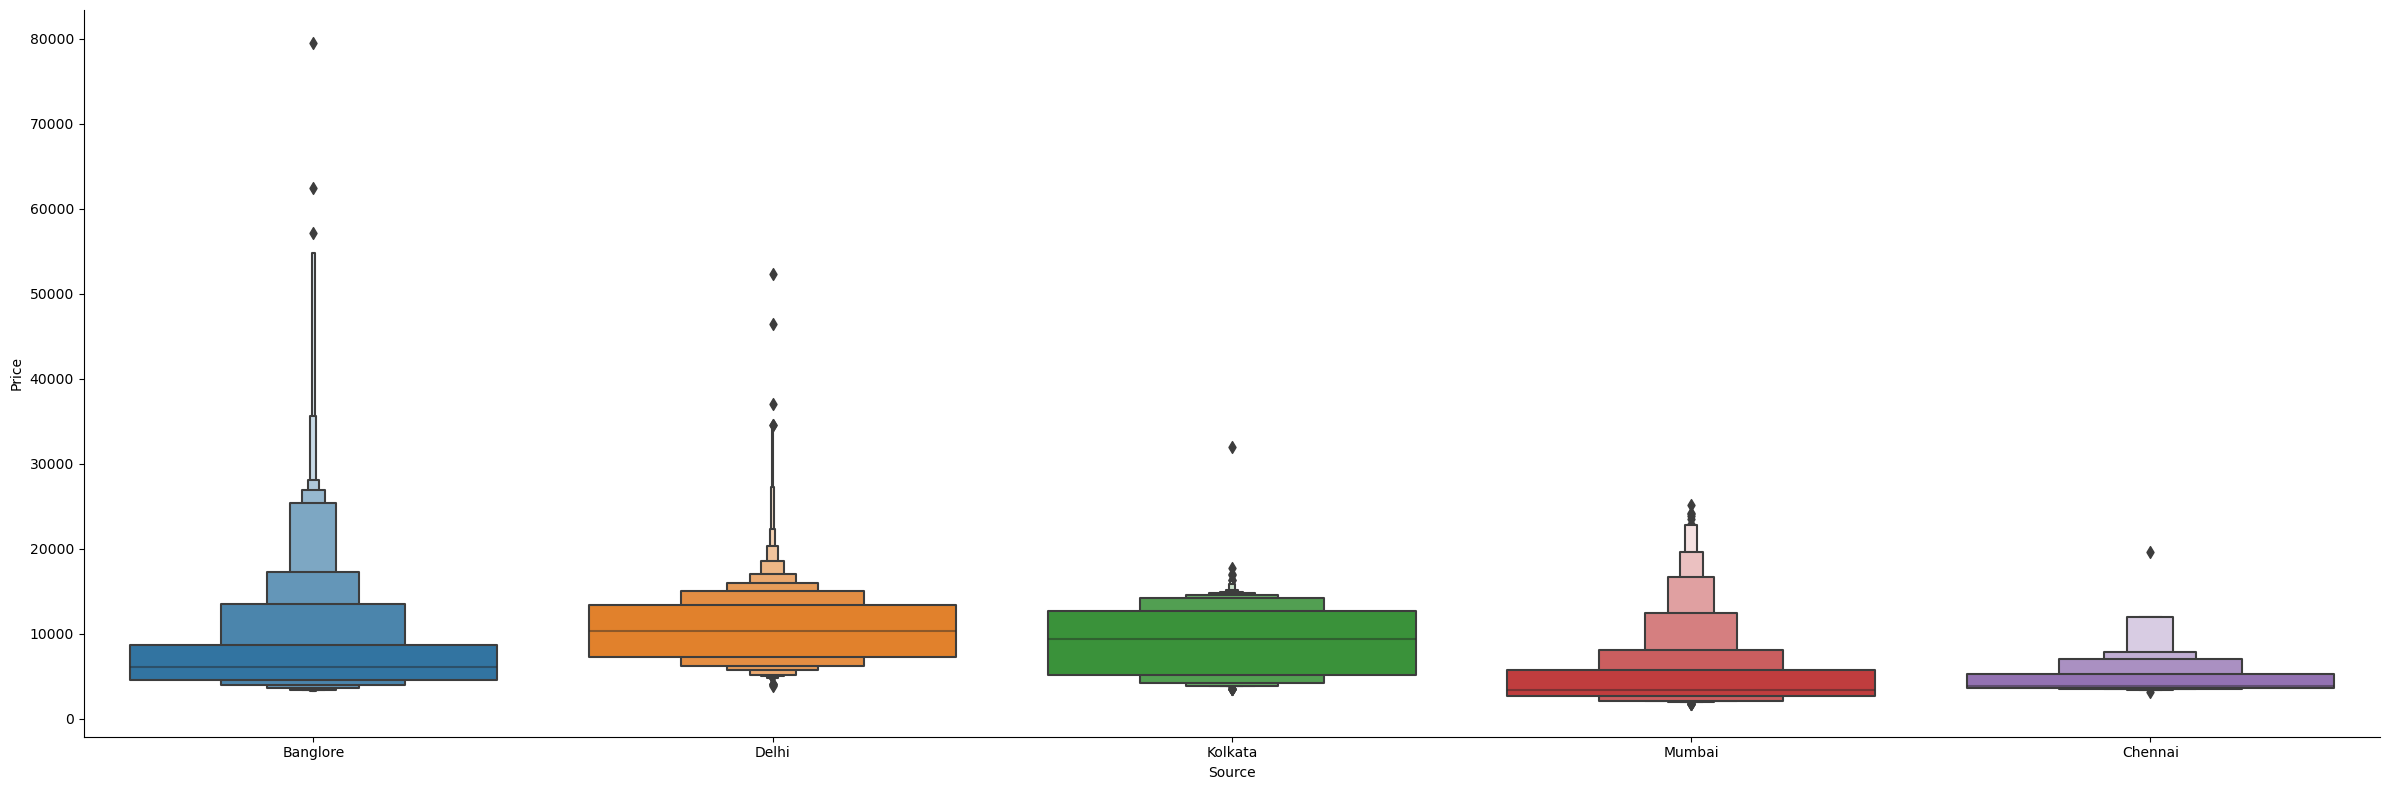

In [43]:
#source vs Price
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)
plt.show()
#

In [44]:
#as source is also nominal categorical data so we apply onehotencoding
Source=data[["Source"]]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

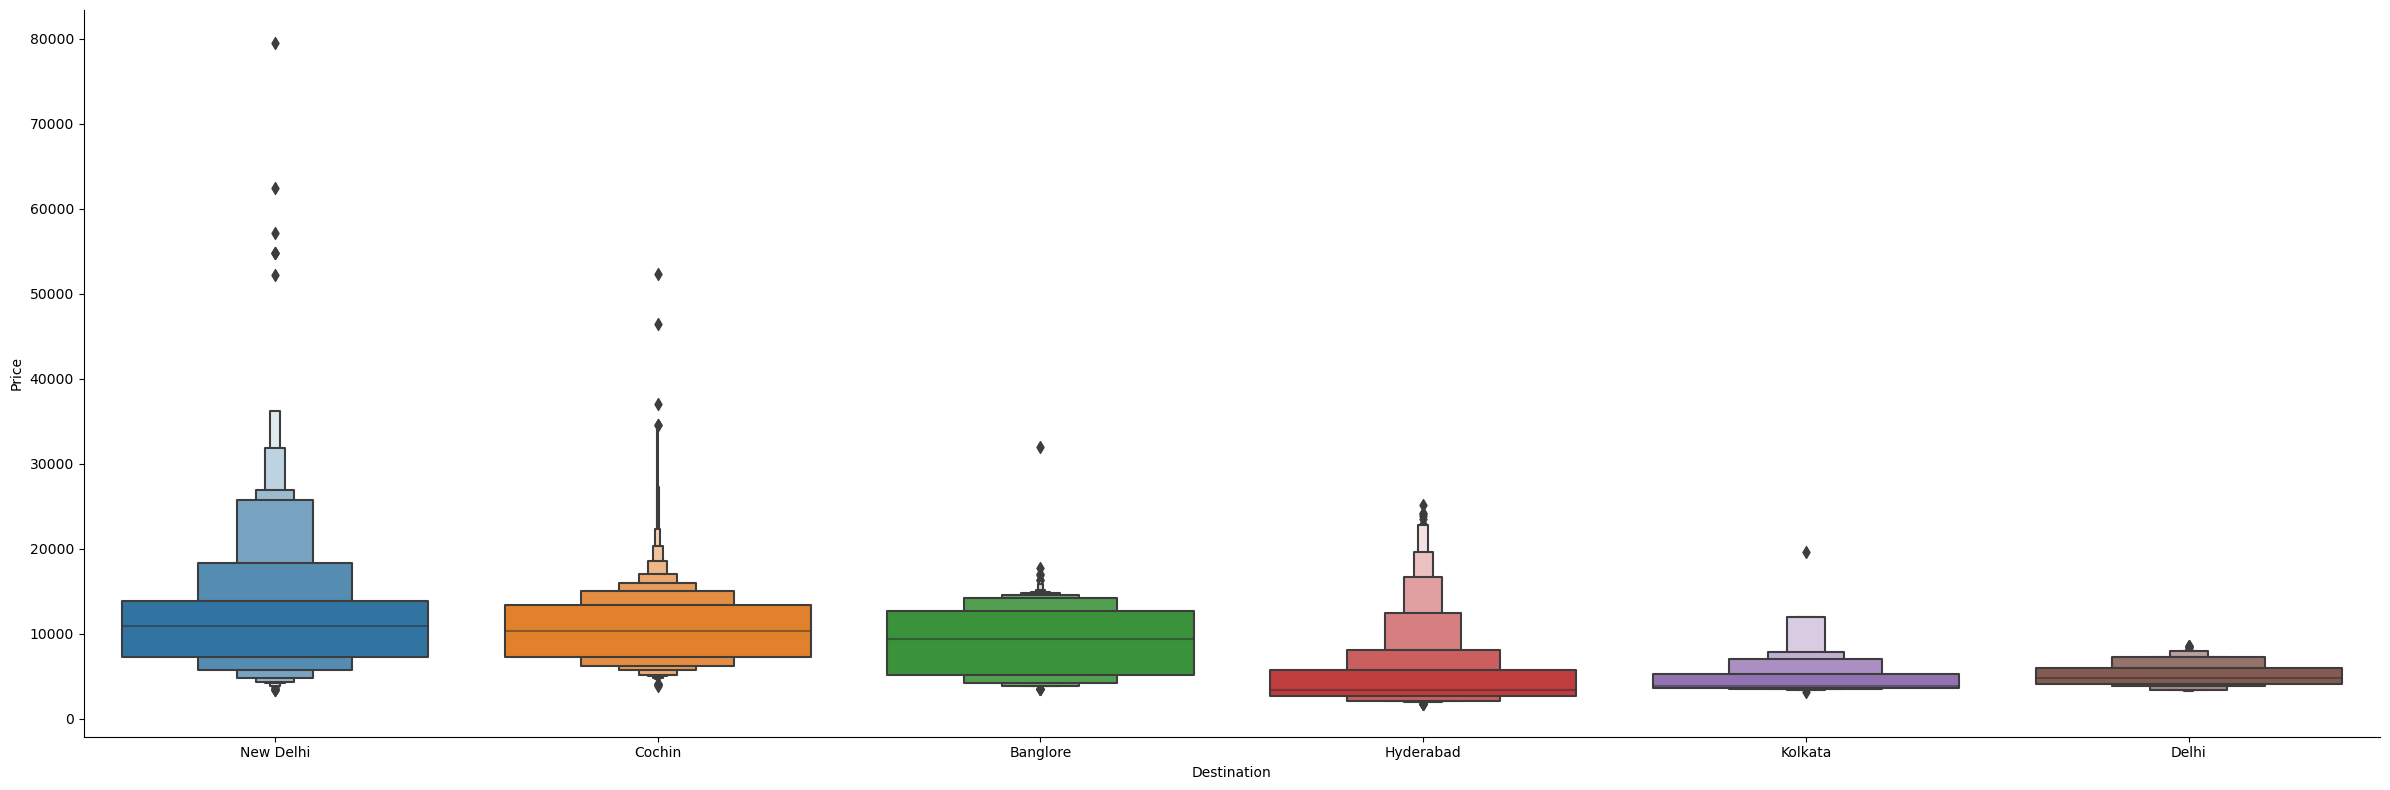

In [46]:
#destination vs price
sns.catplot(y='Price',x='Destination',data=data.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)
plt.show()

In [47]:
#as Destination is also nominal categorical data so we apply onehotencoding
Destination=data[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
#as this is case of ordinal categorical data so we apply labelencoder
#here value is assin=gned with corresponding keys

data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,2,7662,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,2,13882,6,9,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,325,1,6218,5,12,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,285,1,13302,3,1,16,50,21,35,BLR,NAG,DEL,None,None


In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
    

In [50]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    data[i]=le.fit_transform(data[i])
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,445,2,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1140,2,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,325,1,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,285,1,13302,3,1,16,50,21,35,0,34,8,13,5


In [51]:
#concatenate dataframes train_data,Airline,Source,Destination
data=pd.concat([data,Airline,Source,Destination],axis=1)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2,7662,5,1,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2,13882,6,9,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,1,6218,5,12,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1,13302,3,1,16,50,...,0,0,0,0,0,0,0,0,0,1


In [52]:
#now drop categorical columns
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data.head()

,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,5,1,5,50,13,15,2,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,6,9,9,25,4,25,3,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,5,12,18,5,23,30,2,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,3,1,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Total_Stops                                10682 non-null  int64
 2   Price                                      10682 non-null  int64
 3   journey_day                                10682 non-null  int64
 4   journey_month                              10682 non-null  int64
 5   Dep_hour                                   10682 non-null  int64
 6   Dep_min                                    10682 non-null  int64
 7   Arrival_hour                               10682 non-null  int64
 8   Arrival_min                                10682 non-null  int64
 9   Route1                                     10682 non-null  int32
 10  Route2                                     106

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Duration', ylabel='Density'>

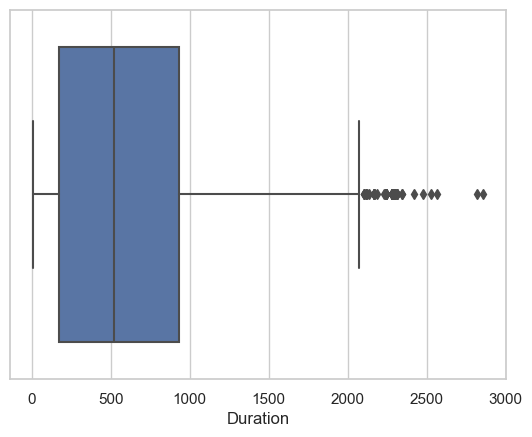

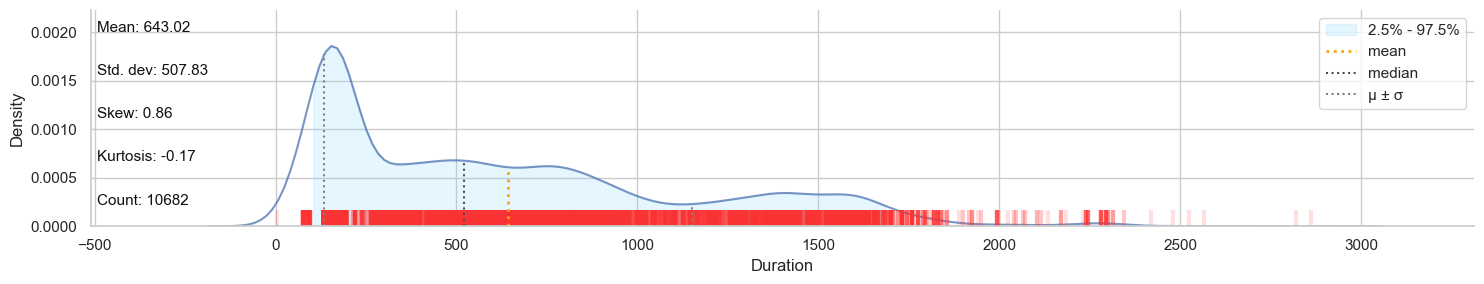

In [54]:
sns.set_theme(style="whitegrid")
sns.boxplot(data['Duration'])
kb.dist_plot(data['Duration'])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Duration', ylabel='Density'>

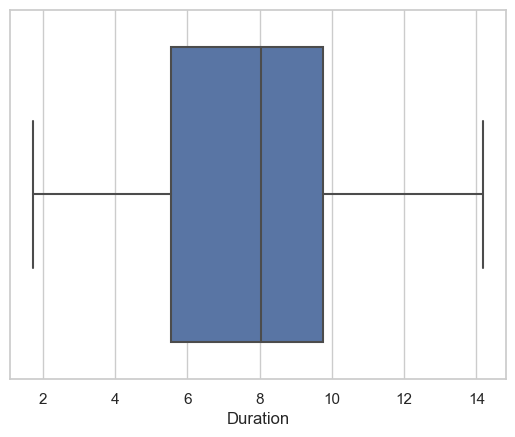

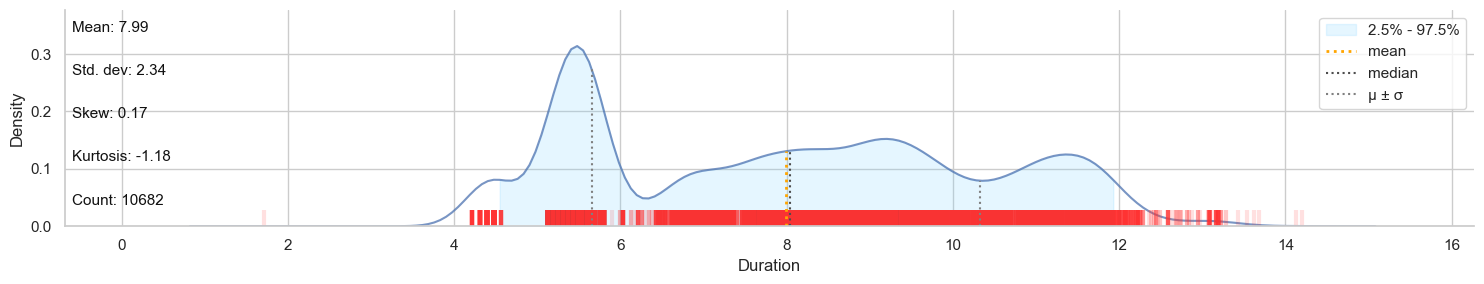

In [55]:
x=np.cbrt(data['Duration'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)

In [56]:
data['Duration']=np.cbrt(data['Duration'])

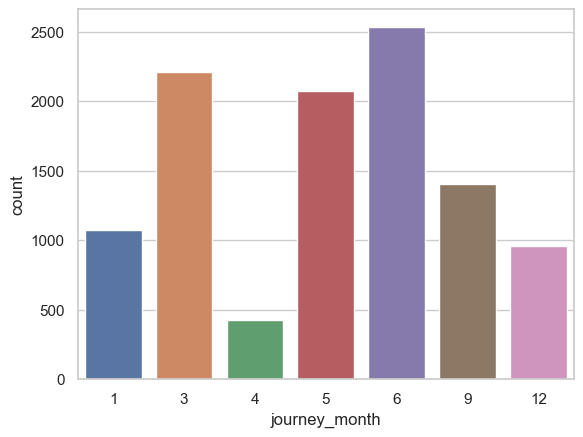

In [57]:
sns.countplot(data['journey_month'])
plt.show()

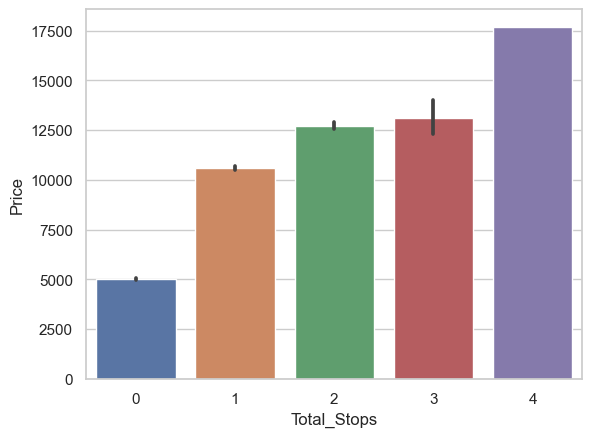

In [58]:
sns.barplot(x='Total_Stops',y='Price',data=data)
plt.show()

In [59]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'journey_day', 'journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [60]:
x_feature=data.loc[:,['Duration', 'Total_Stops', 'journey_day', 'journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

# check for outliers

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Price', ylabel='Density'>

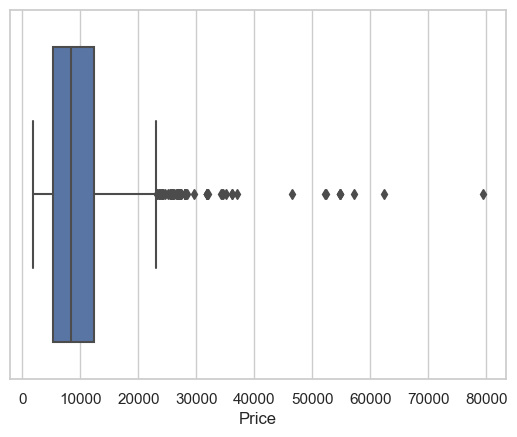

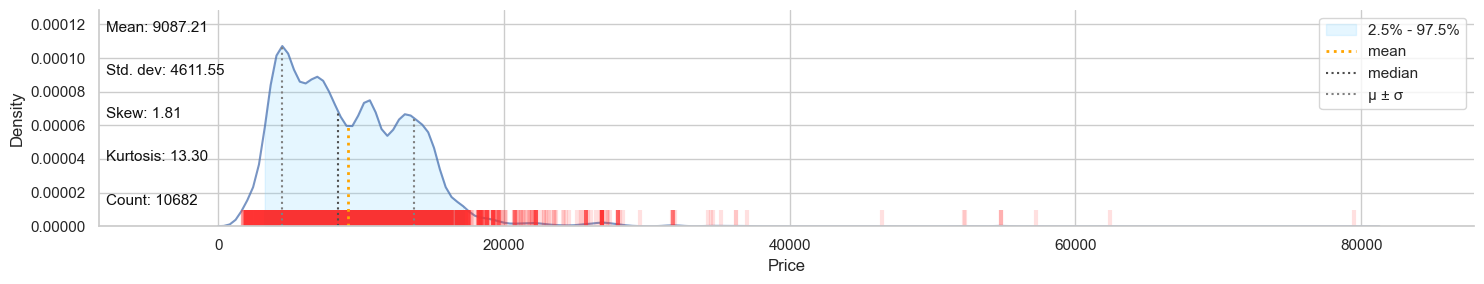

In [61]:
sns.boxplot(data['Price'])
kb.dist_plot(data['Price'])

Handling outliers:
    
    
As there is some outliers in price feature,so we replace it with median.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Price', ylabel='Density'>

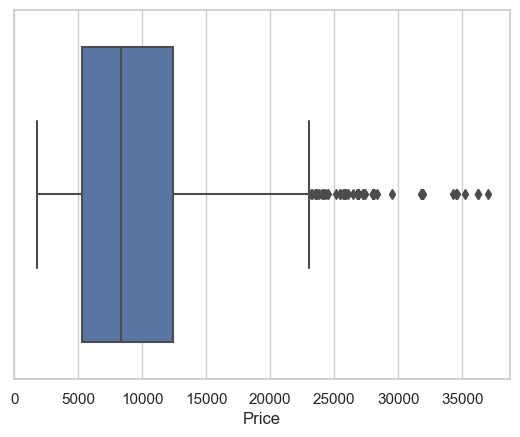

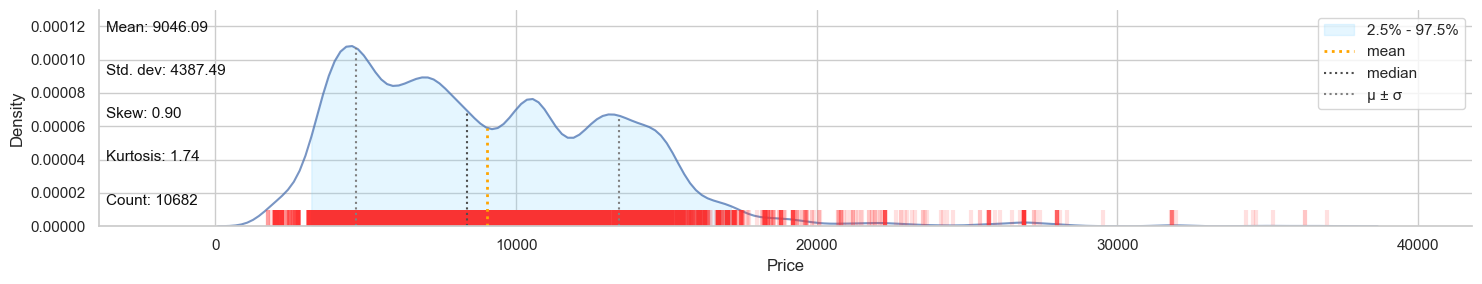

In [62]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])
sns.boxplot(data['Price'])
kb.dist_plot(data['Price'])

# Feature selection

finding out the best feature which will contribute and have a good relation with target variable.Following are the some feature

selection methods

1 heatmap

2 feature importance

3 selectkbest

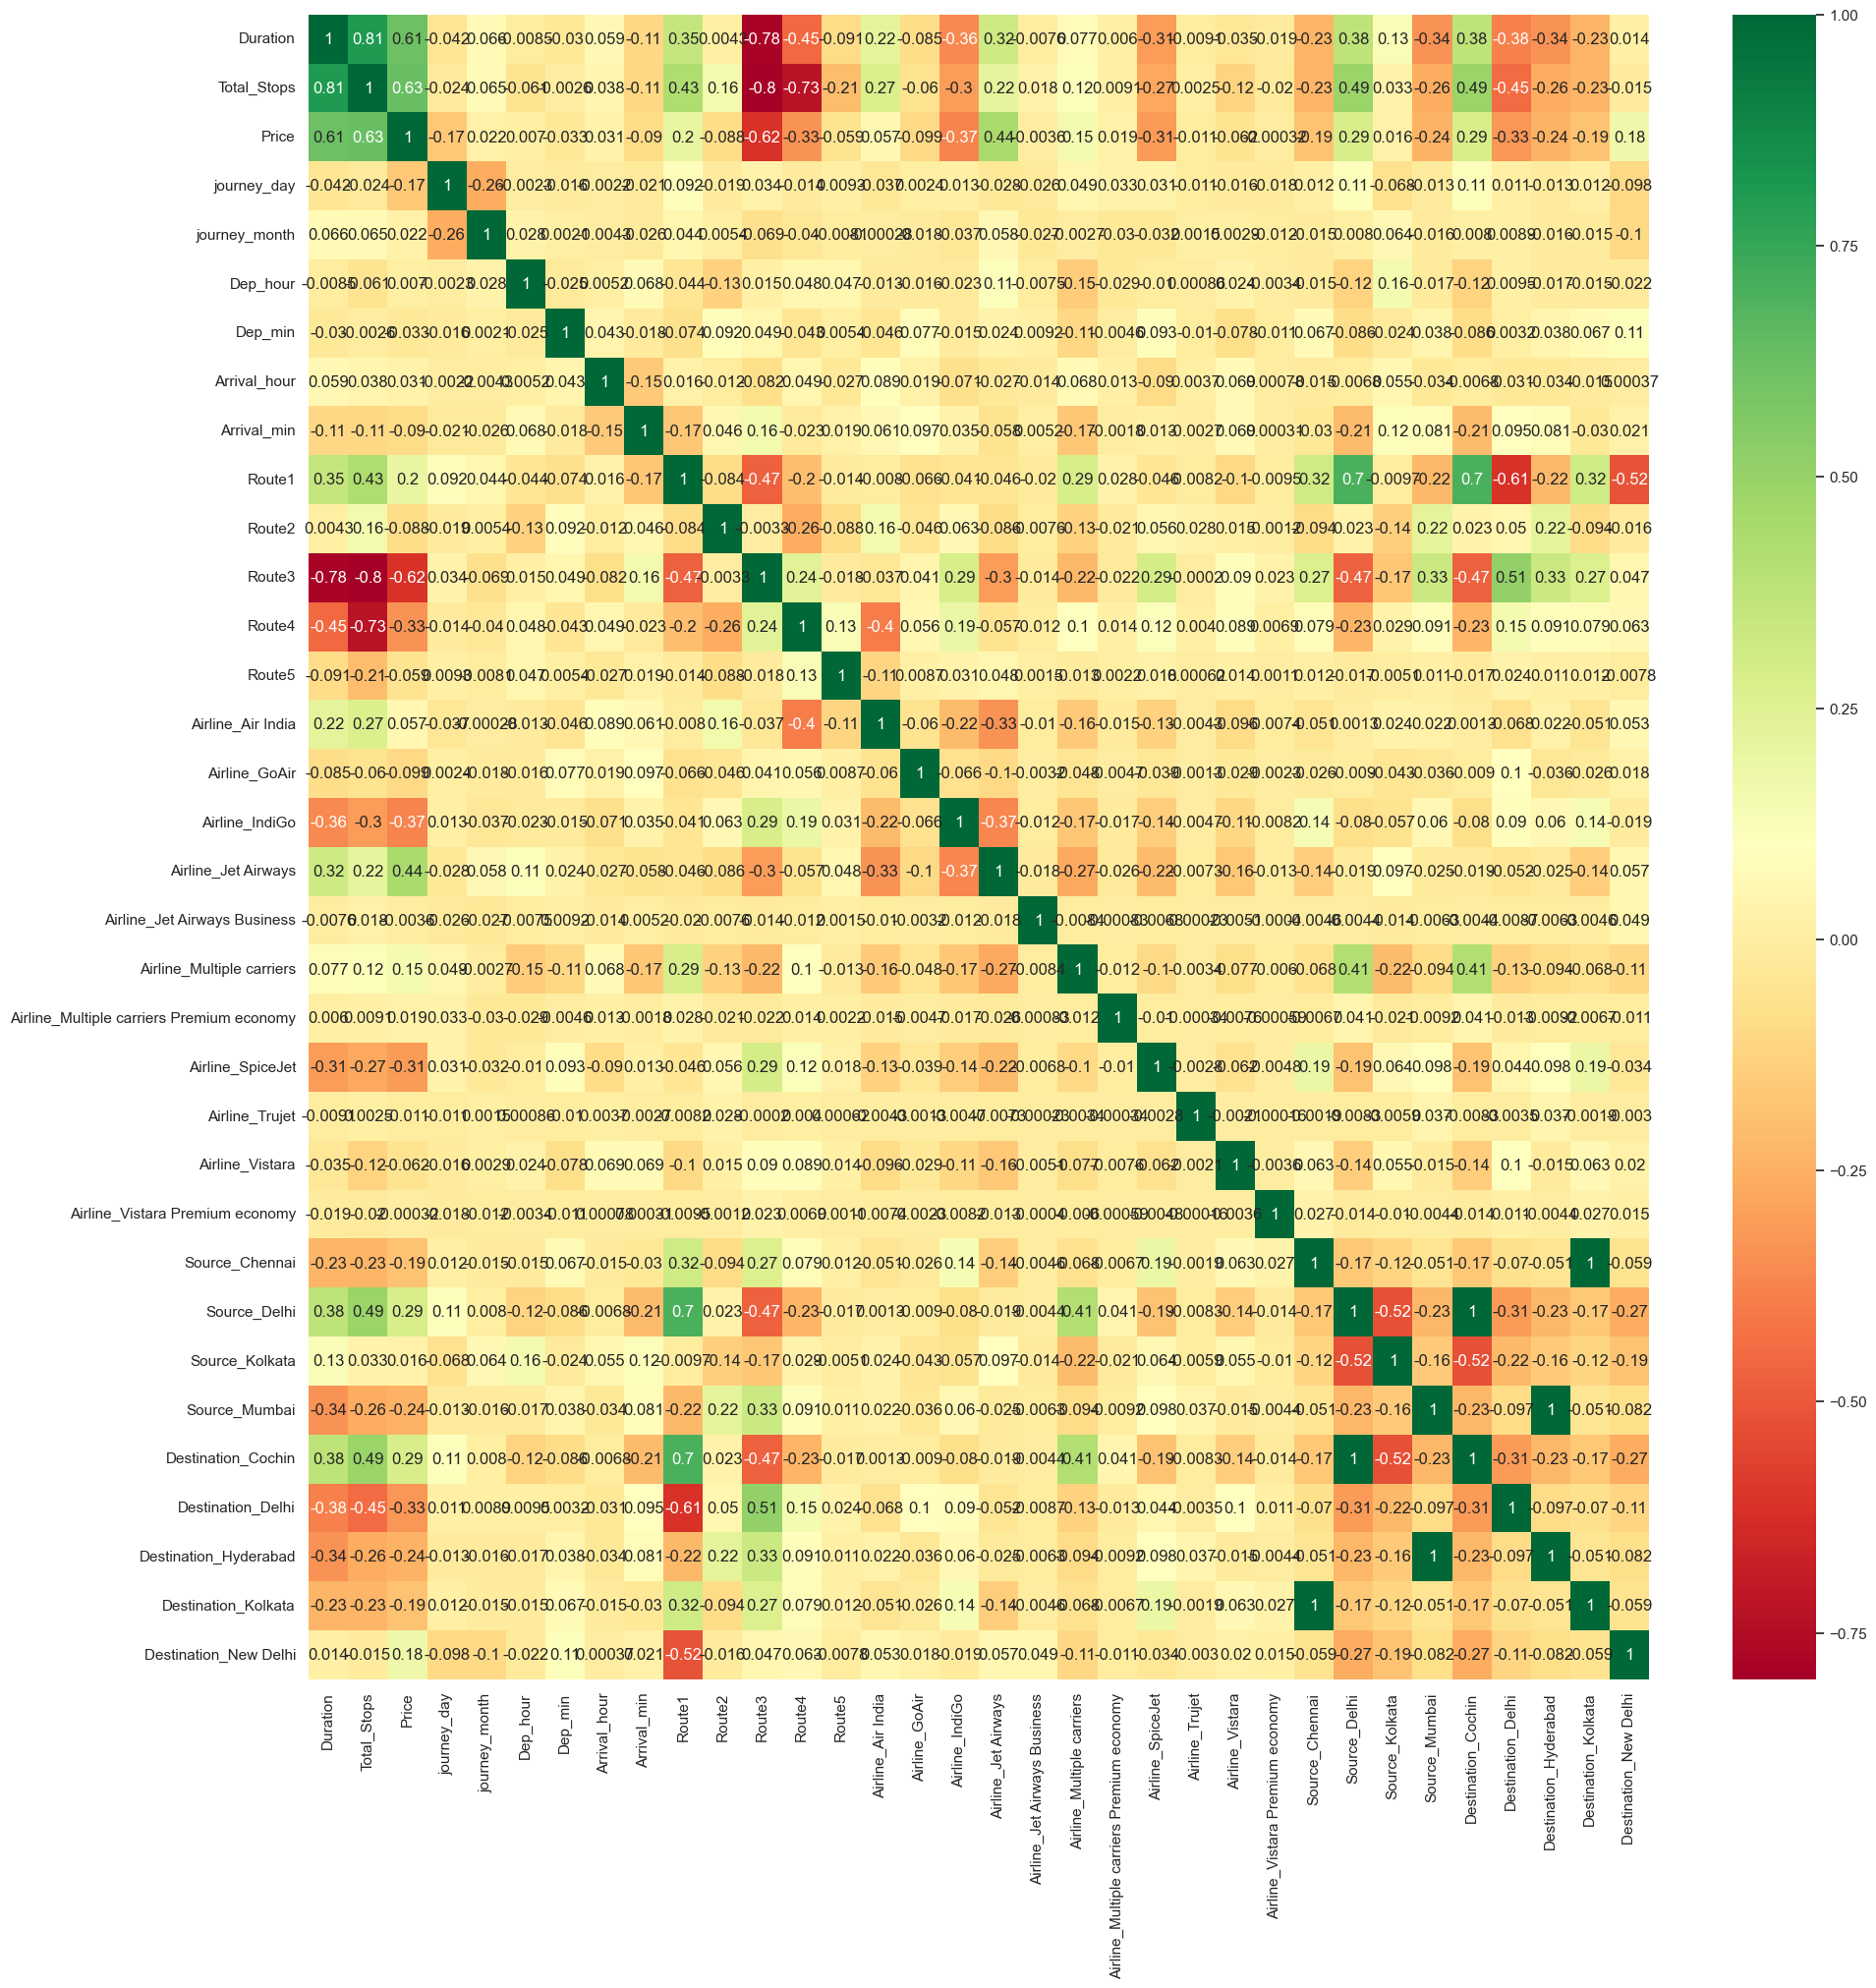

In [63]:
# find corelation between independant and dependant attributes
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()

- here from corelation matrix i have seen that many independent feature are highly corelated with each other so i'm going to drop one feature out of the two

In [64]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'journey_day', 'journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [65]:
X=data.loc[:,['Duration','Total_Stops', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min','Route1',
       'Route2', 'Route3', 'Route4', 'Route5', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy','Source_Chennai', 'Source_Delhi',
       'Source_Kolkata','Source_Mumbai',
        'Destination_Delhi',
        'Destination_New Delhi']]
X.shape

(10682, 29)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc=StandardScaler()
x=sc.fit_transform(X)

In [68]:
y=data.loc[:,'Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [69]:
# important feature using extratree regressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[8.66173202e-02 1.42509172e-01 1.22553073e-01 8.82300016e-02
 2.12079625e-02 2.20071819e-02 1.82226835e-02 1.82504055e-02
 9.37567551e-03 2.51269173e-02 2.31903211e-01 1.99972900e-02
 5.68466602e-04 8.92772449e-03 1.29591751e-03 1.55994779e-02
 1.03682102e-01 3.16922629e-04 2.62197686e-02 1.06076911e-03
 1.91886402e-03 5.68345340e-03 1.20662951e-04 6.51674690e-04
 2.98589180e-03 3.05880657e-03 6.33922420e-03 1.00637787e-03
 1.45630013e-02]


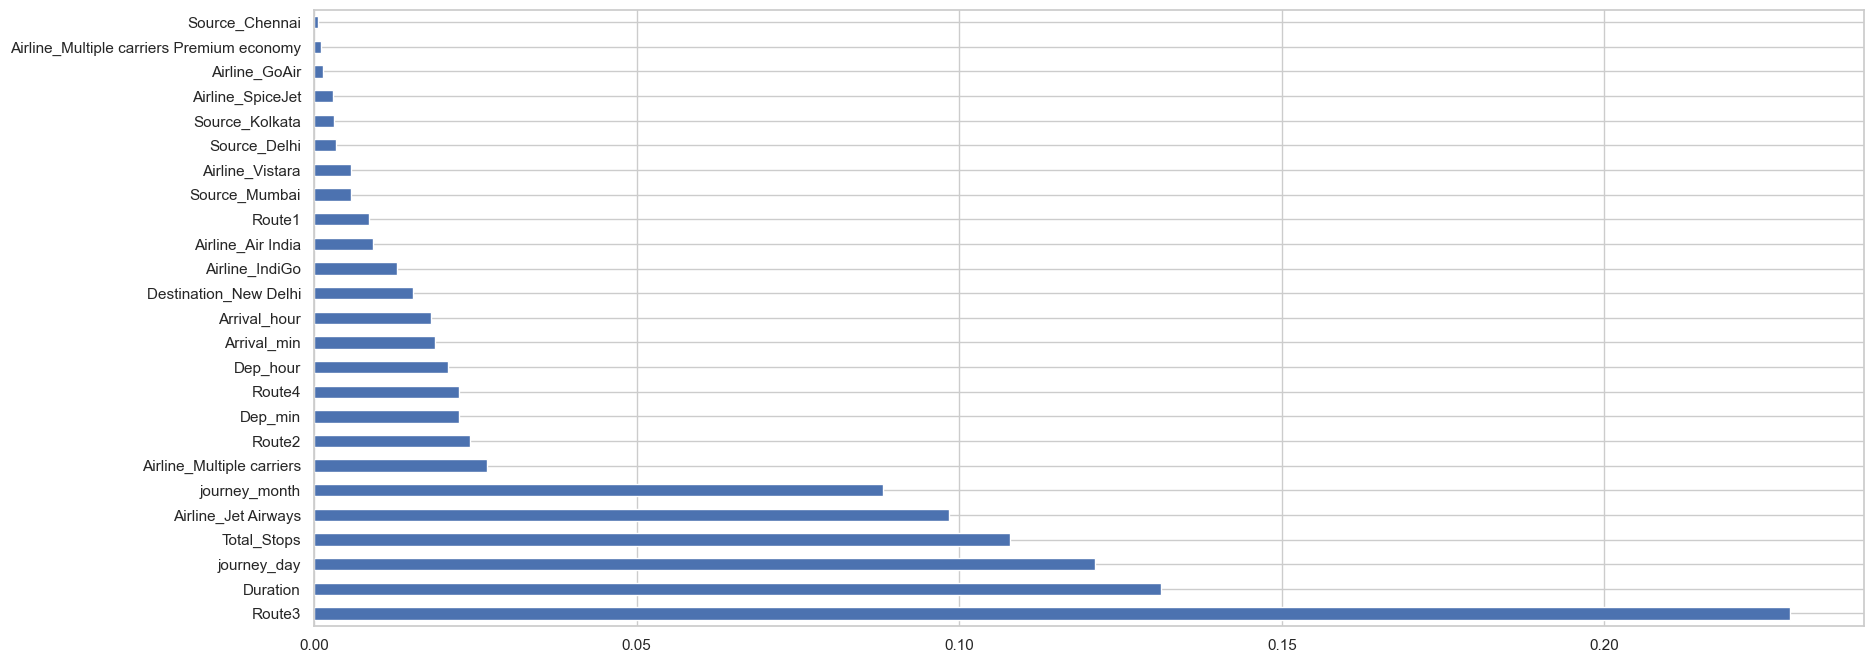

In [61]:
#plot graoh of feature importance for better visualization
plt.figure(figsize=(20,8))
fet_importance=pd.Series(selection.feature_importances_,index=X.columns)
fet_importance.nlargest(25).plot(kind='barh')
plt.show()

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs=SelectKBest(score_func=chi2,k=20)
b=fs.fit(X,y)
b.scores_


array([6.32167045e+03, 5.77831783e+03, 2.70200238e+04, 6.41601048e+03,
       1.10256443e+04, 6.79038563e+04, 1.89346076e+04, 5.04184148e+04,
       7.54556899e+03, 5.07014783e+04, 1.01459248e+05, 7.52267169e+03,
       9.65320311e+01, 8.62573252e+03, 9.37015134e+03, 7.88934544e+03,
       6.73121430e+03, 1.22653846e+03, 9.28755420e+03, 1.06690000e+04,
       8.66556742e+03, 1.00658608e+04, 1.06790000e+04, 1.00769678e+04,
       6.00772759e+03, 7.63276077e+03, 9.77955866e+03, 8.98544352e+03,
       8.97994836e+03])

#  model building 
1 linear regression

2 KNN

3 Dicision Tree

4 Random forest

In [74]:
#linear reggression

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=100)


from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('r2 score',r2_score(y_test,y_pred))
print('training score',model.score(x_train,y_train))
print('testing score',model.score(x_test,y_test))
      



r2 score 0.6274505950019291
training score 0.6114348743289607
testing score 0.6274505950019291


In [64]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
model_knn= KNeighborsRegressor()
model_knn.fit(x_train,y_train)
y_pred=model_knn.predict(x_test)

print('r2 score',r2_score(y_test,y_pred))
print('training score',model_knn.score(x_train,y_train))
print('testing score',model_knn.score(x_test,y_test))


r2 score 0.7398922882822703
training score 0.8297339272880853
testing score 0.7398922882822703


In [85]:
#decision tree regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=100)

model=DecisionTreeRegressor(criterion='squared_error',max_depth=20,min_samples_split=40)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

print('r2 score',r2_score(Y_test,Y_pred))
print('training score',model.score(X_train,Y_train))
print('testing score',model.score(X_test,Y_test))


r2 score 0.8215911645570707
training score 0.8693417105774202
testing score 0.8215911645570707


In [86]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=1000)

model=RandomForestRegressor(max_depth=20,min_samples_split=38,)

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


print('r2 score',r2_score(Y_test,Y_pred)*100)
print('training score',model.score(X_train,Y_train))
print('testing score',model.score(X_test,Y_test))


r2 score 83.3796149704702
training score 0.8698005430337081
testing score 0.8337961497047021


In [68]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=100)

model=GradientBoostingRegressor()

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


print('r2 score',r2_score(Y_test,Y_pred)*100)
print('training score',model.score(X_train,Y_train))
print('testing score',model.score(X_test,Y_test))

r2 score 79.1381441332126
training score 0.7874296133723541
testing score 0.7913814413321261


In [88]:
model=['Linear Reg','KNN','Decision Tree','RandomForest','Gradient Boosting']

In [91]:
pd.DataFrame({'MODEL':model,'r2_score':[0.62,0.73,0.82,0.83,0.79]})

,MODEL,r2_score
0,Linear Reg,0.62
1,KNN,0.73
2,Decision Tree,0.82
3,RandomForest,0.83
4,Gradient Boosting,0.79
